# Exploring the names database

I might like to try some sort of frequency-weighting for namegen, but instead of including each name the same number of times that it appears in the corpus, I will try to find some sort of transformation to make it a little nicer. 

I should note that I am not using any sort of "best-practices" or theory-driven decision making, because the goal isn't to make these look like real names or anything, but rather to "sort of generate some stuff."

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Import names database:

In [2]:
d = pd.read_csv("NationalNames.csv")

Get a sense of the disribution of occurrences per name:

In [19]:
def print_summ(arr):
    print("Range: {} to {}".format(str(round(min(arr), 2)), str(round(max(arr), 2))))
    print("Mean: {}".format(str(round(np.mean(arr), 2))))
    print("Std. dev.: {}".format(str(round(np.std(arr), 2))))
    print("Median: {}".format(str(round(np.median(arr), 2))))

print_summ(d.Count)

Range: 5 to 99680
Mean: 184.69
Std. dev.: 1566.71
Median: 12.0


How about some natural logs?

In [20]:
lcount = np.log(d.Count)
print_summ(lcount)

Range: 1.61 to 11.51
Mean: 2.93
Std. dev.: 1.45
Median: 2.48


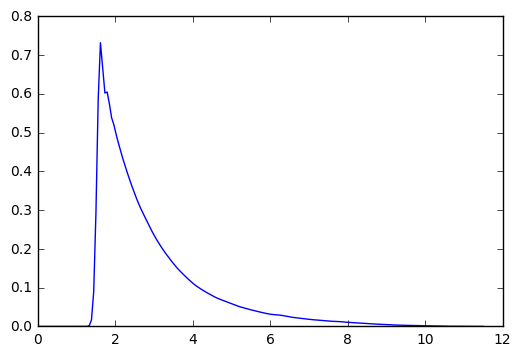

In [15]:
density = gaussian_kde(np.log(d.Count))
# this will be rough
dens_xs = np.linspace(0, np.log(max(d.Count)), 200)
plt.plot(dens_xs, density(dens_xs))
plt.show()

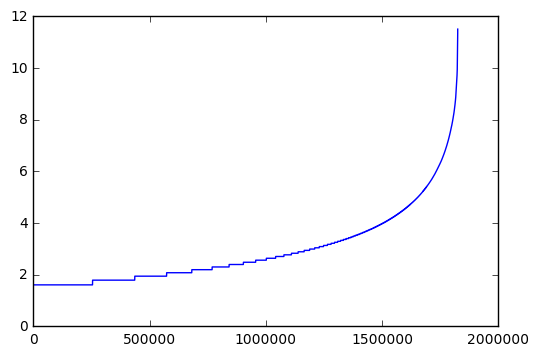

In [29]:
xs = np.arange(1, len(lcount)+1)
plt.plot(xs, np.sort(lcount))
plt.show()

Just to get a sense of the proportions:

In [31]:
len(list(filter(lambda val: val < 11, lcount)))/len(lcount)

0.9998849588015556

In [32]:
len(list(filter(lambda val: val < 4, lcount)))/len(lcount)

0.8239223241828103

In [38]:
sum(lcount.astype(int))/len(lcount)

2.3869492881962802

So it's not going to be too huge, and I can add 1 and then truncate.

In [49]:
transcount = (lcount+1).astype(int)
sum(transcount)

6182649

Then make the list that way:

In [57]:
transd = {'name': d.Name, 'count': transcount}
td = pd.DataFrame(transd)
newlist = []
for row in td.itertuples():
    # (Index=_, count=_, name=_)
    newlist.extend([row[2]]*row[1])
#     print(row)
#     if len(newlist) > 50:
#         break
print(len(newlist), newlist[:10])

6182649 ['Mary', 'Mary', 'Mary', 'Mary', 'Mary', 'Mary', 'Mary', 'Mary', 'Mary', 'Anna']


Looks good. Saving...

In [58]:
with open("ext_names.txt", "w") as f:
    f.write("\n".join(newlist))